---
title: "Introduction to Morphological Operators"
description: "In this tutorial you are gonna explore **kornia.morphology**, that's Kornia's module for differentiable Morphological Operators."
author:
    - "Juclique"
date: 03-08-2021
categories:
    - Basic
    - Morphology
    - kornia.morphology
---

<a href="https://colab.sandbox.google.com/github/kornia/tutorials/blob/master/nbs/morphology_101.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in google colab"></a>

By the end, you will be able to use morphological operations as easy as:

`new_image = morph.operation(original_image, structuring_element)`

But first things first, let's prepare the environment.

## Download Kornia

If you don't have Kornia installed, you can download it using pip.

In [ ]:
%%capture
!pip install kornia
!pip install kornia-rs

## Prepare the image

With `kornia.morphology`, you can apply morphological operators in 3 channel color images. Besides, all operators are differentiable. Let's download the image

In [ ]:
import io

import requests


def download_image(url: str, filename: str = "") -> str:
    filename = url.split("/")[-1].split("?")[0] if len(filename) == 0 else filename
    # Download
    bytesio = io.BytesIO(requests.get(url).content)
    # Save file
    with open(filename, "wb") as outfile:
        outfile.write(bytesio.getbuffer())

    return filename


download_image(
    "https://image.shutterstock.com/image-photo/portrait-surprised-cat-scottish-straight-260nw-499196506.jpg", "img.jpg"
)

'img.jpg'

### Imports and read the image

In [ ]:
import kornia as K
import torch

device = "cpu"  # 'cuda:0' for GPU

In [ ]:
img_t = K.io.load_image("img.jpg", K.io.ImageLoadType.RGB32, device=device)[None, ...]

### Structuring element

We have the original image ready to go, now we need the second part in the operation, the structuring element (aka Kernel).

The kernel must be a 2-dim tensor with odd sides, i.e. 3x3.

In [ ]:
kernel = torch.tensor([[0, 1, 0], [1, 1, 1], [0, 1, 0]]).to(device)

### Making plots!

In this tutorial we are gonna compare the images before and after transforming them.

It make sense to create a function to plot and see the changes!

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams


def plot_morph_image(tensor):
    # kornia.tensor_to_image
    image = K.tensor_to_image(tensor.squeeze(0))  # Tensor to image

    # Plot before-after
    rcParams["figure.figsize"] = 20, 20
    fig, ax = plt.subplots(1, 2)
    ax[0].axis("off")
    ax[0].imshow(K.tensor_to_image(img_t))
    ax[1].axis("off")
    ax[1].imshow(image)

## Morphology

The main goal of kornia.morphology is that you could easily implement several morphological operator as follows:

`new_image = morph.operation(original_image, structuring_element)`

Let's check them all!

### Dilation

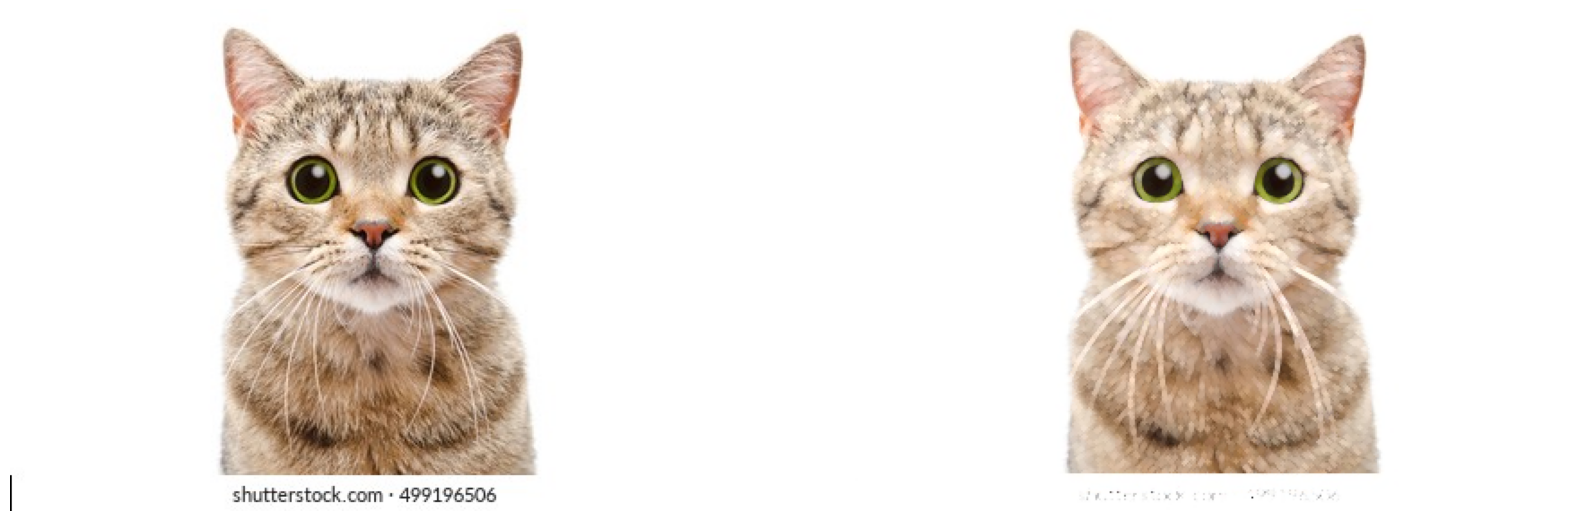

In [ ]:
from kornia import morphology as morph

dilated_image = morph.dilation(img_t, kernel)  # Dilation
plot_morph_image(dilated_image)  # Plot

### Erosion

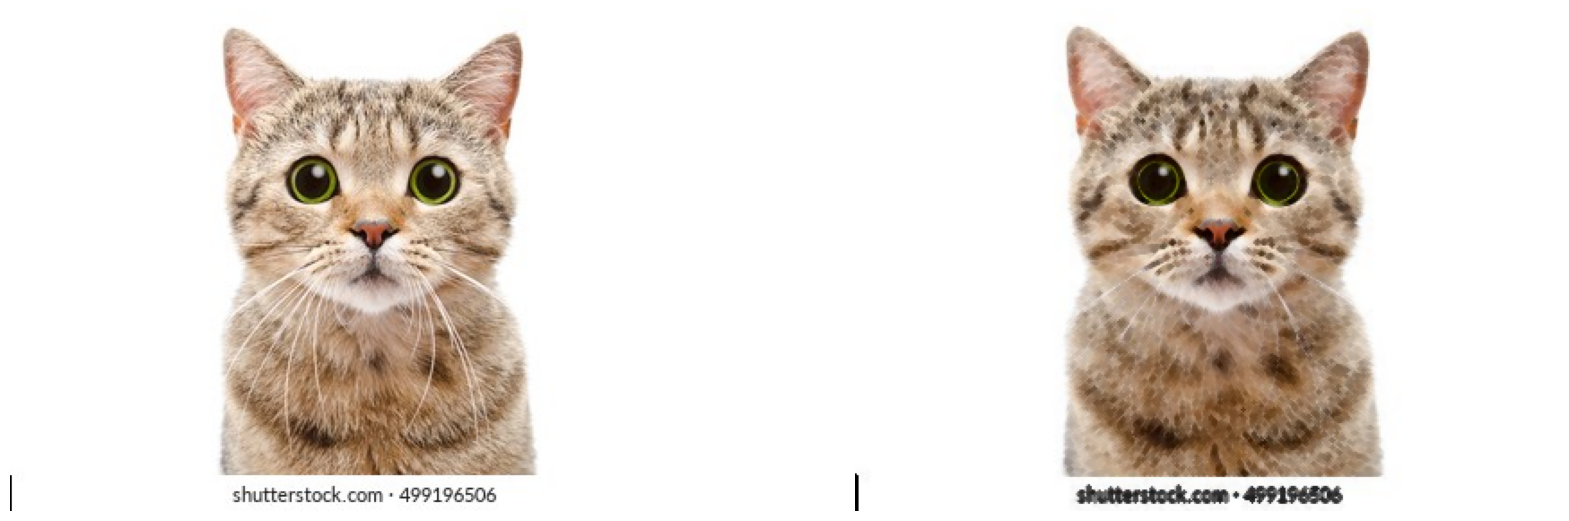

In [ ]:
eroded_image = morph.erosion(img_t, kernel)  # Erosion
plot_morph_image(eroded_image)  # Plot

### Open

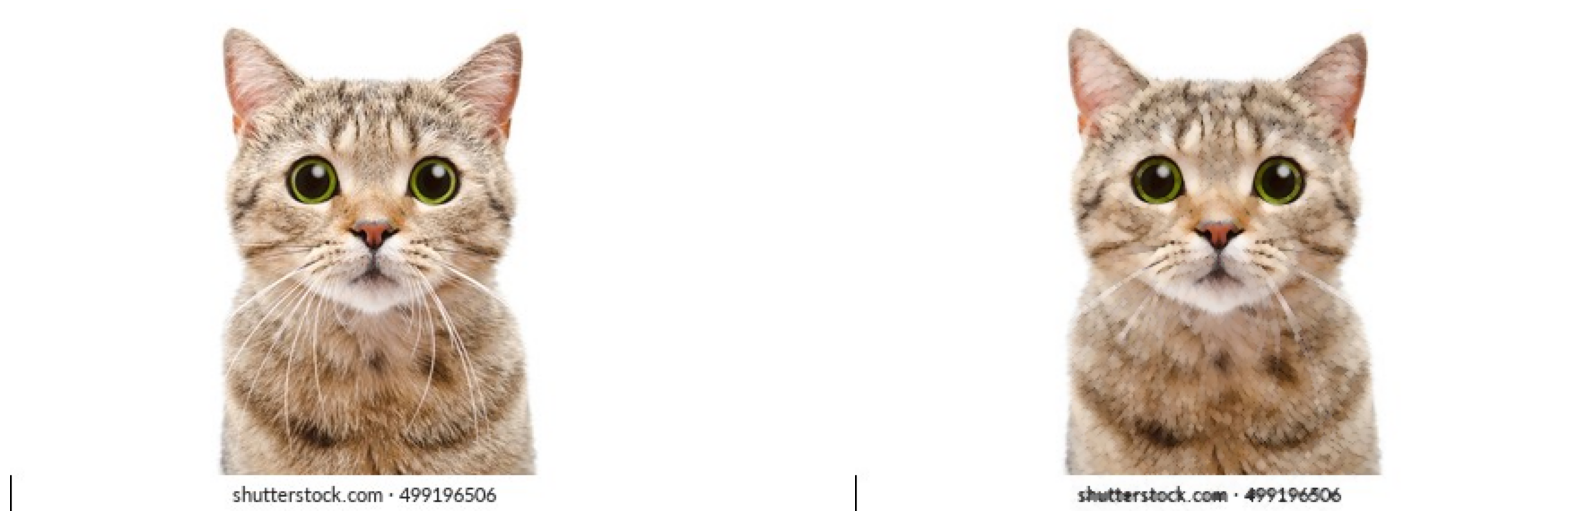

In [ ]:
opened_image = morph.opening(img_t, kernel)  # Open
plot_morph_image(opened_image)

### Close

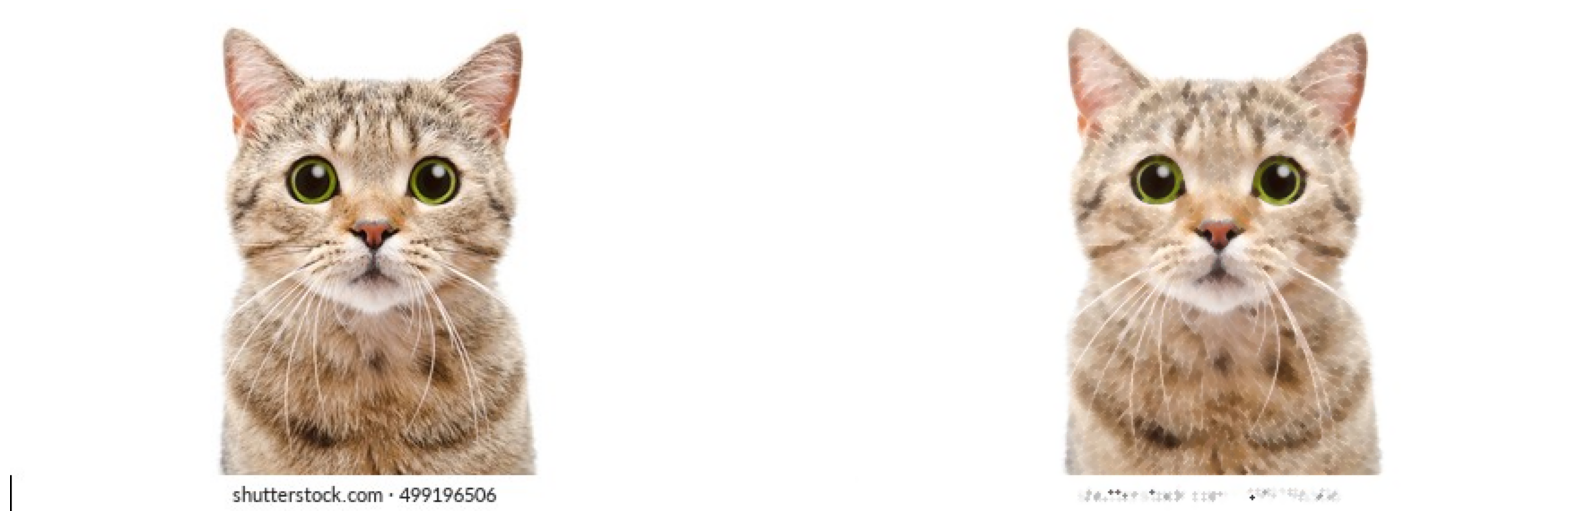

In [ ]:
closed_image = morph.closing(img_t, kernel)  # Close
plot_morph_image(closed_image)  # Plot

### Morphological Gradient

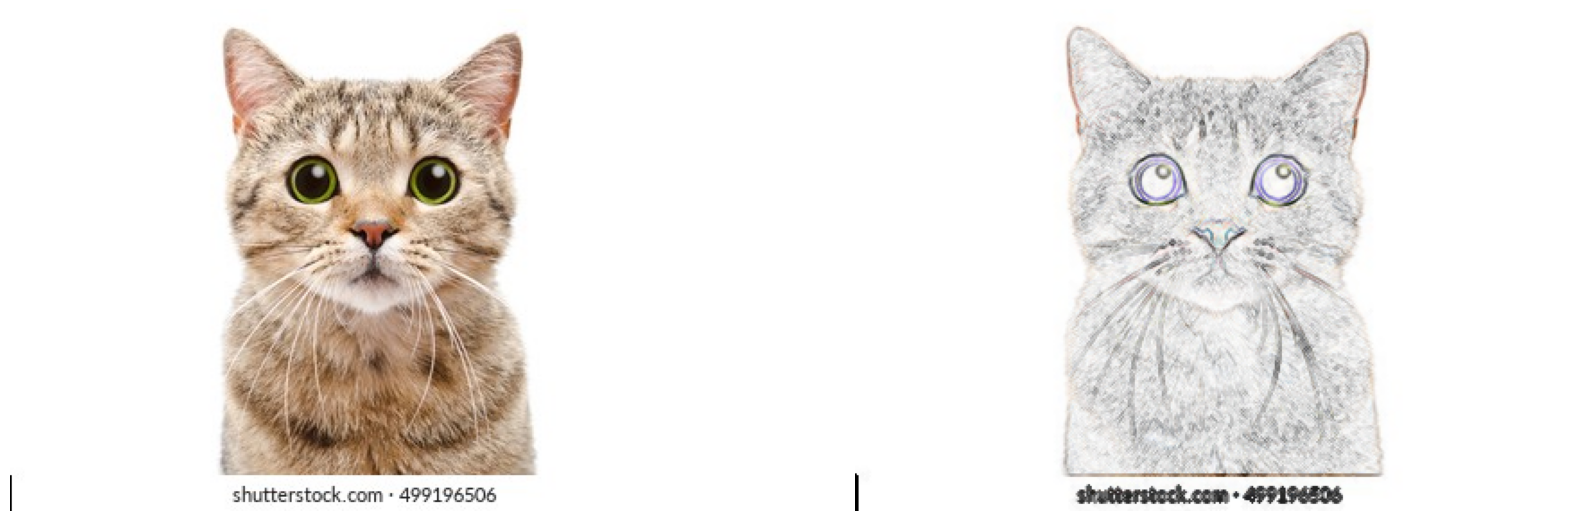

In [ ]:
graded_image = morph.gradient(img_t, kernel)  # Morphological gradient
plot_morph_image(1.0 - graded_image)

### Bottom Hat

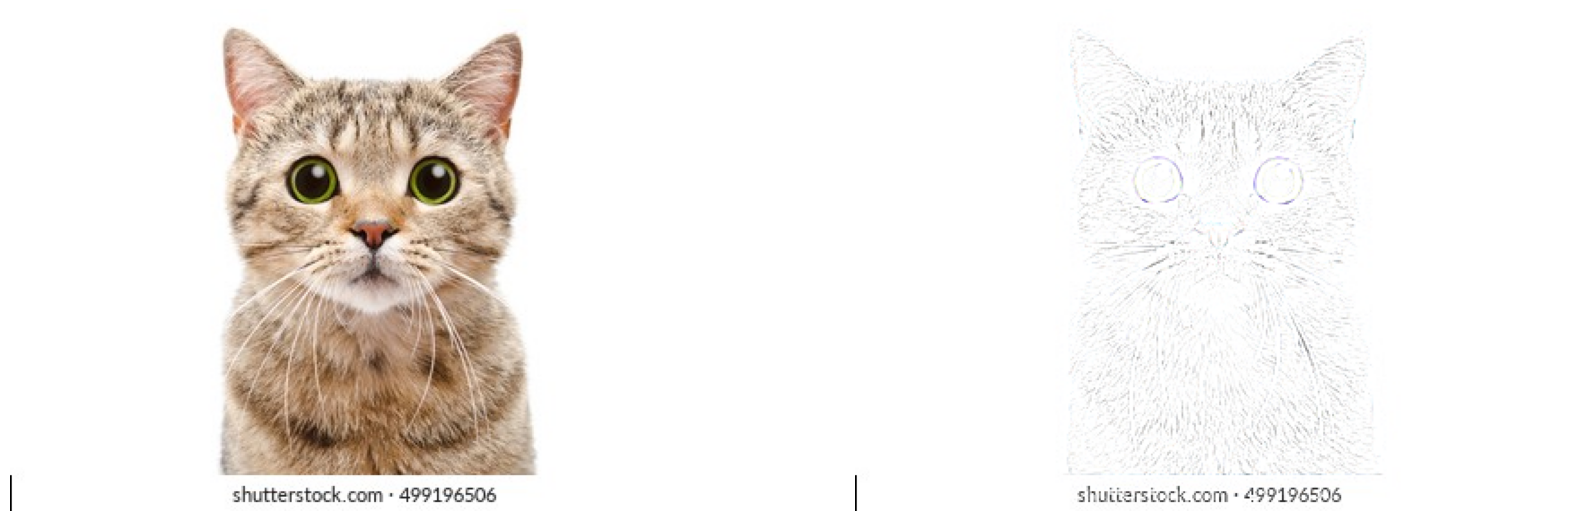

In [ ]:
bottom_image = morph.bottom_hat(img_t, kernel)  # Black Hat
plot_morph_image(1.0 - bottom_image)

### Top Hat

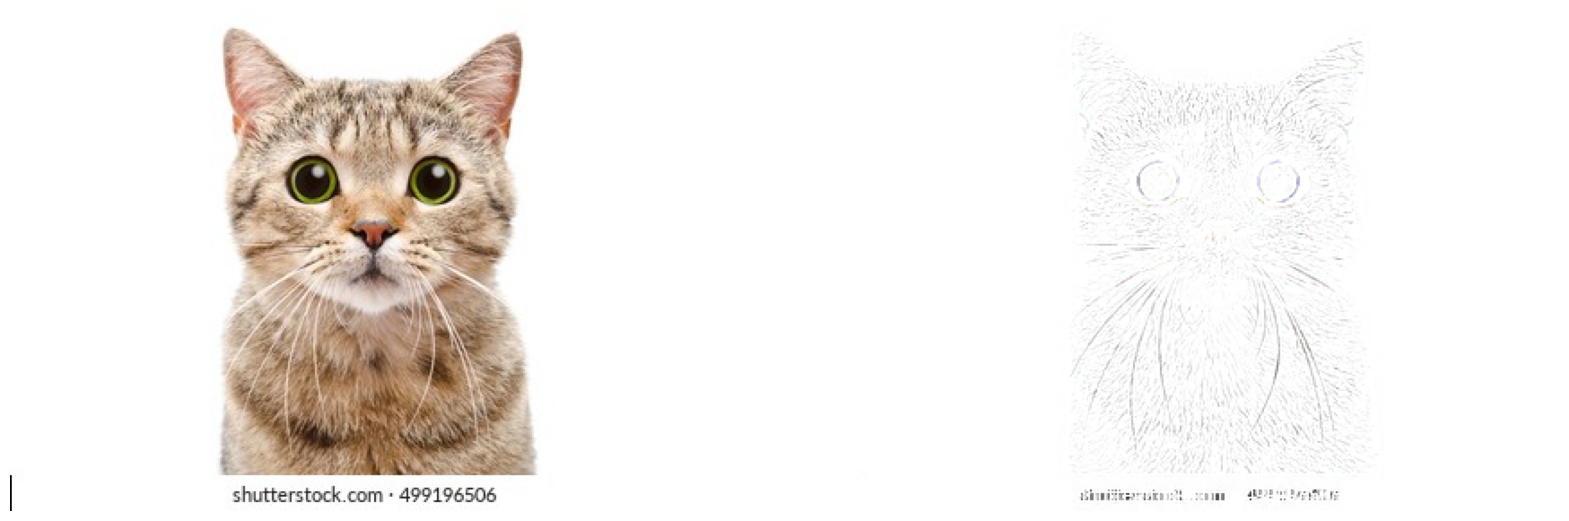

In [ ]:
toph_image = morph.top_hat(img_t, kernel)  # Top Hat
plot_morph_image(1.0 - toph_image)

## Conclusion

And that's it!

Now you know how to use Kornia to apply differentiable morphological operations in your PyTorch pipeline.

Many thanks for using Kornia, and have fun!